In [37]:
# imports
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2 
import pytesseract
# load tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import json
import shutil

# erase test data
try:
    shutil.rmtree('./data/subdata')
except:
    pass

# recreate subdata directory
try:
    os.mkdir('./data/subdata')
except:
    pass

img_shape: 368 1267
block_number: 1
block_text: 9
block_confidence: 97.65338897705078
block_width: 0.014572322368621826
block_height: 0.07836702466011047
block_left: 0.012460844591259956
block_top: 0.8780025243759155
block_polygon: [{'X': 0.027033166959881783, 'Y': 0.9563695788383484}, {'X': 0.012460844591259956, 'Y': 0.9563695788383484}, {'X': 0.012460844591259956, 'Y': 0.8780025243759155}, {'X': 0.027033166959881783, 'Y': 0.8780025243759155}]
block_polygon_x1: 0.027033166959881783
block_polygon_y1: 0.9563695788383484
block_polygon_x2: 0.012460844591259956
block_polygon_y2: 0.9563695788383484
block_polygon_x3: 0.012460844591259956
block_polygon_y3: 0.8780025243759155
block_polygon_x4: 0.027033166959881783
block_polygon_y4: 0.8780025243759155
{'BlockType': 'LINE', 'Confidence': 97.65338897705078, 'Text': '9', 'Geometry': {'BoundingBox': {'Width': 0.014572322368621826, 'Height': 0.07836702466011047, 'Left': 0.012460844591259956, 'Top': 0.8780025243759155}, 'Polygon': [{'X': 0.0270331669

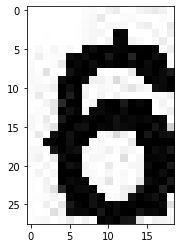



img_shape: 368 1267
block_number: 2
block_text: E
block_confidence: 20.996980667114258
block_width: 0.0055672526359558105
block_height: 0.028040118515491486
block_left: 0.021805474534630775
block_top: 0.8504478335380554
block_polygon: [{'X': 0.027372727170586586, 'Y': 0.8784879446029663}, {'X': 0.021805474534630775, 'Y': 0.8784879446029663}, {'X': 0.021805474534630775, 'Y': 0.8504478335380554}, {'X': 0.027372727170586586, 'Y': 0.8504478335380554}]
block_polygon_x1: 0.027372727170586586
block_polygon_y1: 0.8784879446029663
block_polygon_x2: 0.021805474534630775
block_polygon_y2: 0.8784879446029663
block_polygon_x3: 0.021805474534630775
block_polygon_y3: 0.8504478335380554
block_polygon_x4: 0.027372727170586586
block_polygon_y4: 0.8504478335380554
{'BlockType': 'LINE', 'Confidence': 20.996980667114258, 'Text': 'E', 'Geometry': {'BoundingBox': {'Width': 0.0055672526359558105, 'Height': 0.028040118515491486, 'Left': 0.021805474534630775, 'Top': 0.8504478335380554}, 'Polygon': [{'X': 0.02

-1

In [38]:
img = cv2.imread('./data/testimage2.jpeg')
ocr = json.load(open('./data/testimage2.json',))
blocks = ocr['Blocks']
hImg, wImg, _ = img.shape

count = 1
for block in blocks:
    if block['BlockType'] == 'LINE':
        print('img_shape:', hImg, wImg)
        block_number = count
        print('block_number:', block_number)
        block_text = block['Text']
        print('block_text:', block_text)
        block_confidence = float(block['Confidence'])
        print('block_confidence:', block_confidence)
        block_width = float(block['Geometry']['BoundingBox']['Width'])
        print('block_width:', block_width)
        block_height = float(block['Geometry']['BoundingBox']['Height'])
        print('block_height:', block_height)
        block_left = float(block['Geometry']['BoundingBox']['Left'])
        print('block_left:', block_left)
        block_top = float(block['Geometry']['BoundingBox']['Top'])
        print('block_top:', block_top)
        block_polygon = block['Geometry']['Polygon']
        print('block_polygon:', block_polygon)
        block_polygon_x1 = float(block['Geometry']['Polygon'][0]['X'])
        print('block_polygon_x1:', block_polygon_x1)
        block_polygon_y1 = float(block['Geometry']['Polygon'][0]['Y'])
        print('block_polygon_y1:', block_polygon_y1)
        block_polygon_x2 = float(block['Geometry']['Polygon'][1]['X'])
        print('block_polygon_x2:', block_polygon_x2)
        block_polygon_y2 = float(block['Geometry']['Polygon'][1]['Y'])
        print('block_polygon_y2:', block_polygon_y2)
        block_polygon_x3 = float(block['Geometry']['Polygon'][2]['X'])
        print('block_polygon_x3:', block_polygon_x3)
        block_polygon_y3 = float(block['Geometry']['Polygon'][2]['Y'])
        print('block_polygon_y3:', block_polygon_y3)
        block_polygon_x4 = float(block['Geometry']['Polygon'][3]['X'])
        print('block_polygon_x4:', block_polygon_x4)
        block_polygon_y4 = float(block['Geometry']['Polygon'][3]['Y'])
        print('block_polygon_y4:', block_polygon_y4)
        print(block)
        #if count <= 30:
        left_boundary = int(block_polygon_x1*wImg)
        top_boundary = int(block_polygon_y1*hImg)
        right_boundary = int(block_polygon_x3*wImg)
        bottom_boundary = int(block_polygon_y3*hImg)
        print('left_boundary:', left_boundary)
        print('right_boundary:', right_boundary)
        print('bottom_boundary:', top_boundary)
        print('top_boundary:', bottom_boundary)
        if count ==1:
            
            crop_img = img[top_boundary:bottom_boundary, left_boundary:right_boundary]
            print(crop_img)
            if str(crop_img) == '[]':
                print('dssdfas')
                crop_img = img[bottom_boundary:top_boundary, right_boundary:left_boundary]
                print(crop_img)
            cv2.imwrite('./data/subdata/{}.png'.format(block_text), crop_img)
            plt.imshow(crop_img)
            plt.show()
            #cv2.imwrite('./data/subdata/crop_img_{}.png'.format(count), crop_img)
            cv2.rectangle(img, (left_boundary,top_boundary), (right_boundary, bottom_boundary), (0,0,255),1)

            #cv2.putText(img, block_text, (int(block_polygon_x1*wImg),int((block_polygon_y1*hImg)+25)), cv2.FONT_HERSHEY_COMPLEX, 1, (50,50,255),2)

        count += 1
        print('\n')
        

cv2.imshow('Result', img)
cv2.waitKey(0)

In [9]:
# create output dictionary
dic = {}

for root, dirs, files in os.walk('./data'):
    for file in files:
        if ('testimage' in file) and ('.jpeg' in file):
            print('analyzing image', file)
            # create entry for file in dictionary
            filename = file.rsplit('.')[0]
            dic[filename] = []
            # filepath for image
            img_filepath = os.path.join(root,file).replace('\\', '/')
            # load image
            img = cv2.imread(img_filepath)
            for file in files:
                print(file)
                if file.endswith('.png'):
                    print('file:', file)
                    subimg_text = file.rsplit('.')[0]
                    subimg_filepath = os.path.join(root,file).replace('\\', '/')
                    subimg = cv2.imread(subimg_filepath)
                
                    # use cv2's matchTemplate function to check for presence of subimage within image
                    result = cv2.matchTemplate(img,subimg,cv2.TM_CCOEFF_NORMED)
                    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
                    # maxVal serves as confidence interval
                    # if confidence is greater than or equal to 90%, include in output
                    if maxVal >= 0.90:
                        # get x,y coordinates of highlest confidence match
                        (startX, startY) = maxLoc
                        # get x,y coordinates of subimage endpoint
                        endX = startX + subimg.shape[1]
                        endY = startY + subimg.shape[0]
                        # draw the bounding box on the image
                        cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 1)
                        dic[filename].append(subimg_text)


                        print(maxVal)
                        print(maxLoc)

#                 cv2.imshow("Output", img)
#                 cv2.waitKey(0)

analyzing image testimage1.jpeg
happy-birthday-text-outline.jpg
testimage1.jpeg
testimage1.json
testimage2.jpeg
testimage2.json
testimage3.jpeg
testimage3.json
testimage4.jpeg
testimage4.json
testimage5.jpeg
testimage5.json
WiDpa.jpg
analyzing image testimage2.jpeg
happy-birthday-text-outline.jpg
testimage1.jpeg
testimage1.json
testimage2.jpeg
testimage2.json
testimage3.jpeg
testimage3.json
testimage4.jpeg
testimage4.json
testimage5.jpeg
testimage5.json
WiDpa.jpg
analyzing image testimage3.jpeg
happy-birthday-text-outline.jpg
testimage1.jpeg
testimage1.json
testimage2.jpeg
testimage2.json
testimage3.jpeg
testimage3.json
testimage4.jpeg
testimage4.json
testimage5.jpeg
testimage5.json
WiDpa.jpg
analyzing image testimage4.jpeg
happy-birthday-text-outline.jpg
testimage1.jpeg
testimage1.json
testimage2.jpeg
testimage2.json
testimage3.jpeg
testimage3.json
testimage4.jpeg
testimage4.json
testimage5.jpeg
testimage5.json
WiDpa.jpg
analyzing image testimage5.jpeg
happy-birthday-text-outline.jpg


In [8]:
print(dic)

{'testimage1': [], 'testimage2': [], 'testimage3': [], 'testimage4': [], 'testimage5': []}


In [28]:



img = cv2.imread('./data/testimage3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(pytesseract.image_to_string(gray))



## detect characters ##
hImg, wImg, _ = img.shape
config = r'--oem 3 --psm 6'
boxes = pytesseract.image_to_boxes(img, config = config)

for b in boxes.splitlines():
#     print(b)
    b = b.split(' ')
#     print(b)
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img, (x,hImg-y), (w, hImg - h), (0,0,255),1)
    cv2.putText(img, b[0], (x,hImg-y+25), cv2.FONT_HERSHEY_COMPLEX, 1, (50,50,255),2)

# ## detect words ##
# hImg, wImg, _ = gray.shape
# boxes = pytesseract.image_to_data (gray)
# for x,b in enumerate(boxes.splitlines()):
# #     print(b)
#     if x != 0:
#         b = b.split()
#         print(b)
#         if len(b) == 12:
#             x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
#             cv2.rectangle(gray, (x,y), (w+x,h+y), (0,0,255),1)
#             cv2.putText(gray, b[11], (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (50,50,255),2)

# ## detect numbers only ##
# hImg, wImg, _ = gray.shape
# config = r'--oem 3 --psm 6 outputbase digits'
# boxes = pytesseract.image_to_data(gray,config = config)
# for x,b in enumerate(boxes.splitlines()):
# #     print(b)
#     if x != 0:
#         b = b.split()
#         print(b)
#         if len(b) == 12:
#             x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
#             cv2.rectangle(gray, (x,y), (w+x,h+y), (0,0,255),1)
#             cv2.putText(gray, b[11], (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (50,50,255),2)
x = pytesseract.image_to_string(img,config=config)
x = [item.split(' ') for item in x.split('\n')]
for i in x:
    print(i)  
cv2.imshow('Result', img)
cv2.waitKey(0)
# blur = cv2.GaussianBlur(gray, (7,7), 0)
# ret, BW = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

# plt.imshow(BW)
# plt.show()




['Woo', 'tiod', 'on]', 'wap', 'bolle', 'a', '(hl', 'eet', 'SE', 'pe', 'mal', 'ua', 'i']
['‘zpos', 'ay', 'ELW', 'ea', 'a', 'aie:', 'Si', 'PO?', 'eT', '10']
['defo', 'eieieieht', 'es', 'er', 'eae']
['OW', 'AT', 'UT', 'a', 'at', '7', 'N', "10¥%s'", '5', 'i', '57']
['als', '25', 'an', 'FSF', 'eapeyes']
['7]', '<i', 'aa', '(5', 'Sr', '=|', 'V0', 'el', 'a', 'a', 'ae', 'Vc', 'el', 'ee', 'Ke', 'Ee']
['\x0c']


-1

In [13]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# preprocess the image
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# blur the image to remove noise
gray = cv2.medianBlur(gray, 3)

# write the new grayscale image to disk 
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

True

In [15]:
# load the image as a PIL/Pillow image, apply OCR 
text = pytesseract.image_to_string(Image.open(filename))
print(text)
# show the output image
cv2.imshow("Image", img)
cv2.imshow("Output", gray)
cv2.waitKey(0)

-1

In [16]:

imgBlur = cv2.GaussianBlur(img, (9, 9), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTH = cv2.morphologyEx(imgBlur, cv2.MORPH_TOPHAT, kernel)
imgBin = cv2.threshold(imgTH, 0, 250, cv2.THRESH_OTSU)
imgdil = cv2.dilate(imgBin, kernel)
imgBin_Inv = cv2.threshold(imgdil, 0, 250, cv2.THRESH_BINARY_INV)
cv2.imwrite('./ocr-noise-text-2.png', imgBin_Inv)
cv2.waitKey(0)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\thresh.cpp:1557: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)
